In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

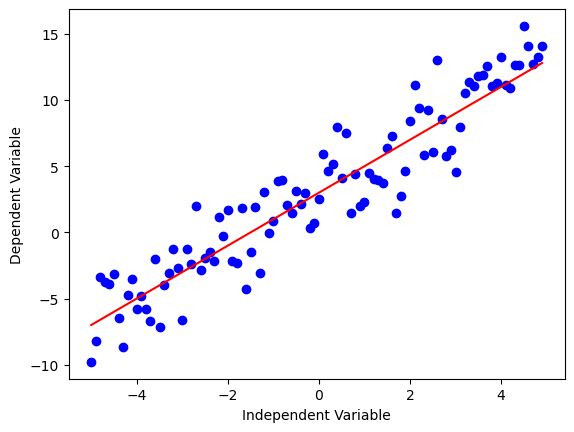

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size =x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

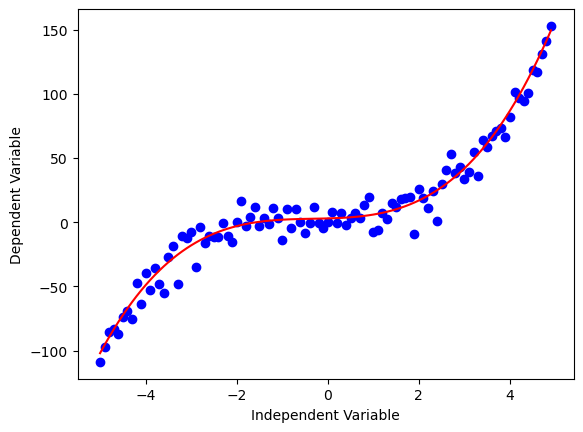

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = -10 * np.random.normal(size =x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Quadratic

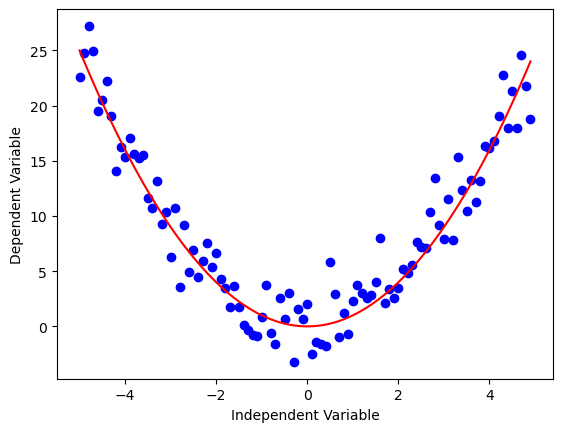

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size =x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Exponential

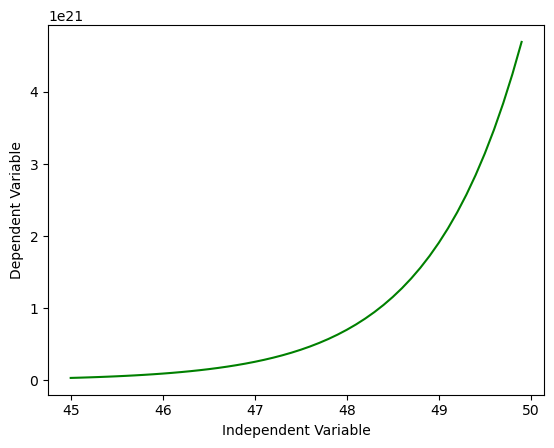

In [7]:
x = np.arange(45, 50, 0.1)
y = np.exp(x)
plt.plot(x, y, color = 'green')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Logarithmic

C:\Users\hello\AppData\Local\Temp\ipykernel_10344\568898737.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


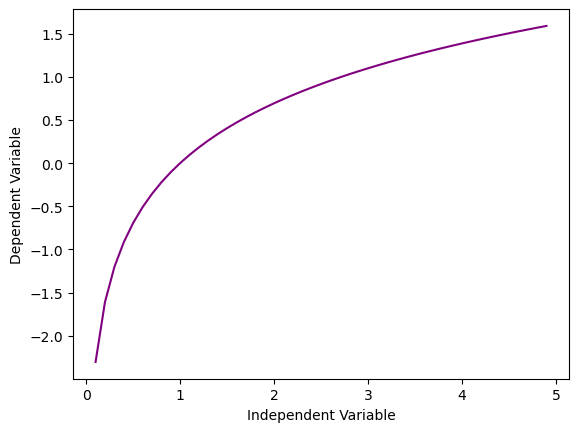

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
plt.plot(x, y, color = 'purple')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Sigmoidal/Logistic

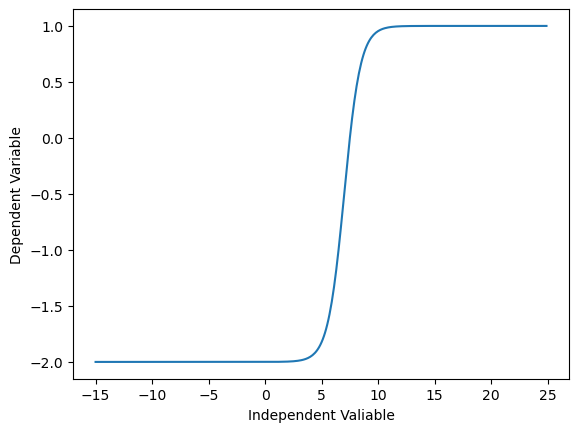

In [17]:
x = np.arange(-15, 25, 0.1)
y = 1-3/(1+np.power(4,x-7))
plt.plot(x, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Valiable')
plt.show()

## Downloading data

In [20]:
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
response = requests.get(url)

with open("china_gdp.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [26]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## plotting the dataset

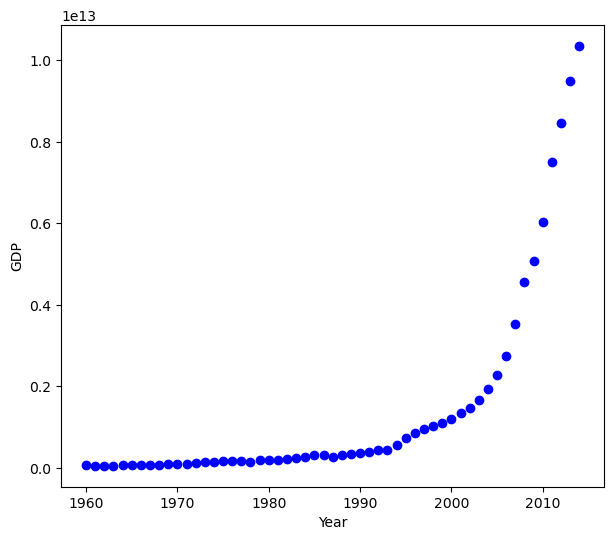

In [37]:
plt.figure(figsize=(7,6))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data , y_data , 'bo')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## choosing a model

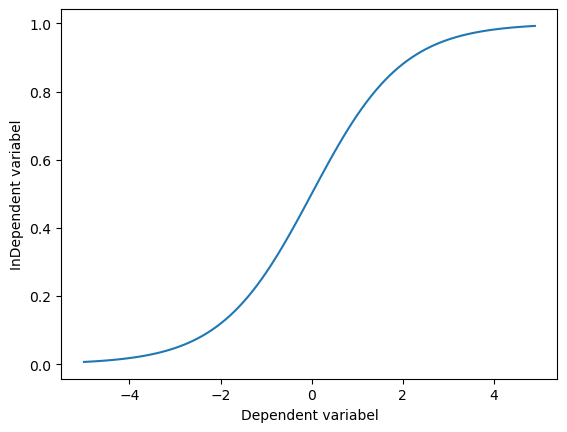

In [51]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.xlabel('Dependent variabel')
plt.ylabel('InDependent variabel')
plt.show()

## y=1/(1+e^(β_1(x-β_2))

## bulding the model

In [54]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1+ np.exp(-Beta_1*(x-Beta_2)))
    return y

## Lets look at a sample sigmoid line that might fit with the data:

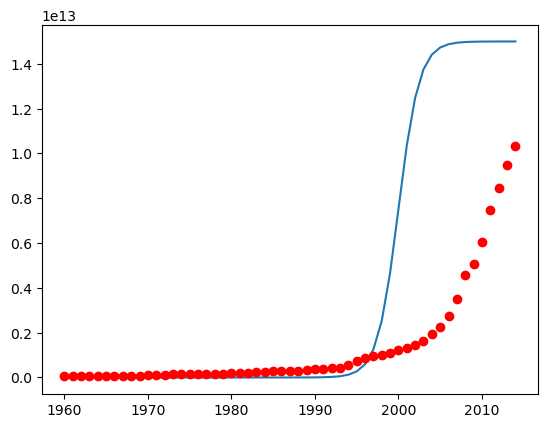

In [77]:
#Controls the curve's steepness
Beta_1 = 0.80
#Slides the curve on the x-axis
Beta_2 = 2000.0

Y_pred = sigmoid(x_data, Beta_1, Beta_2)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

## Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [68]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

### find the best parameters for fit line 

In [71]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print ('Beta_1 : %f, Beta_2 : %f '% (popt[0], popt[1]))

Beta_1 : 690.451712, Beta_2 : 0.997207 


### plot our resulting regression model

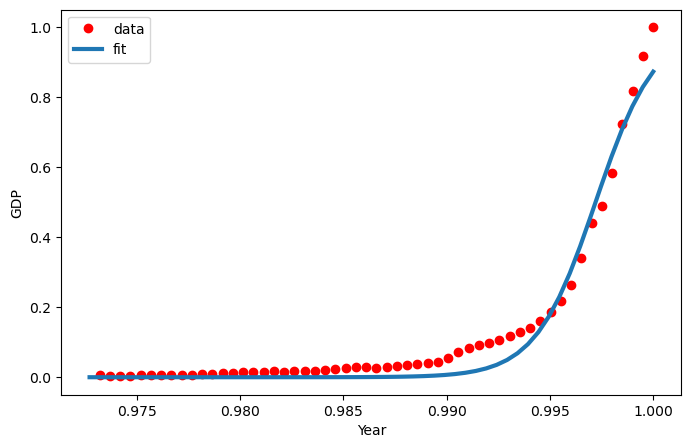

In [73]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()